# Topic Modeling and Clustering




- Understanding general topics of a large number of documents: which words are frequently used together
    
- Topic modeling: application of statistical methods to find topics from a corpus of documents

- Topics: a probability distribution of features (words, n-grams,...)

- Topics are not clearly separated. They overlap with each other

- A document cannot possibly assigned to a single topic. A document always contains a mixture of different topics

-Unsupervised methods analyze the frequency with which words appear to infer the latent topics in a corpus of texts


    



- The algorithm doesn't have any predefined topic labels to apply to its output
- Three usual algorithms:
    
    1 non-negative matrix factorization (NMF)
    
    2. Single-value decomposition (LSI)
    
    2 sparse principal components analysis (sparce PCA)
    
    3 latent dirichlet allocation (LDA)
    

**LDA** is widely used because of its good results
    

In [ ]:
We will use librairies from:
    
    - NLTK
    
    - Scikit-learn

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

 ### Topic Modeling on a Real Dataset UN General debates    

In [8]:
file="un-general-debates.csv"
df=pd.read_csv(file)

In [ ]:
df.info()

In [ ]:
print(df.loc[2666,'text'])

In [ ]:
print(df.loc[4729,'text'])

### Initial step : preprocessing 

Cleaning and tokenize the text 

    1 Lowercase letters
    2 n-grams if needed
    3 stemming
    4 stop words
    5 Term frequency-inverse document frequency
    
Aim: to obtain a corpus (each text is reprensented by an array)

- CountVectorizer() : we generate the matrix of the frequency of the words of each text
    - CountVectorizer allows for preprocessing if we include specific parameters such as:
        - stop_words : to include stop words,
        - ngram_range : to include n-grams
        - lowercase=True : to convert all characters to lowercase

In [9]:
import textacy
import textacy.preprocessing as tprep

preproc = tprep.make_pipeline(
    tprep.replace.urls,
    tprep.remove.html_tags,
    tprep.normalize.hyphenated_words,
    tprep.normalize.quotation_marks,
    tprep.normalize.unicode,
    tprep.remove.accents,
    tprep.remove.punctuation,
    tprep.normalize.whitespace,
    tprep.replace.numbers
)

In [10]:
df['clean_text']=df['text'].apply(preproc)

In [ ]:
print(df.loc[4729,'clean_text'])

## Tokenization 

In [11]:
import spacy 
import en_core_web_sm
en = en_core_web_sm.load()

# Import stopword from spaCy
#import spacy 

# Import stopword from spaCy
#import spacy 
#loading the english language small model of spacy

stopwords_spa = en.Defaults.stop_words

print(len(stopwords_spa))
include_stopwords={'_NUMBER_'}
stopwords_spa|= include_stopwords
print(len(stopwords_spa))
print(stopwords_spa)
print(type(stopwords_spa))

326
327
{'those', 'due', 'what', '_NUMBER_', 'moreover', 'sometimes', 'either', 'also', '‘ll', 'their', 'formerly', 'doing', 'over', 'will', 'please', 'beside', 'then', 'becomes', 'nobody', 'made', 'seems', 'yet', 'eleven', 'other', 'until', 'which', 'each', 'hereupon', 'they', 'being', 'hers', 'hereby', 'been', 'be', 'who', 'should', 'yours', 'top', "'d", 'whereas', 'seemed', 'last', '‘s', 'amongst', 'for', 'nothing', 'give', 'whose', 'n’t', 'really', 'as', 'say', 'me', 'into', 'anything', 'unless', 'every', 'whoever', 'another', 'are', 'after', 'thus', '’s', 'thereby', "'ve", 'via', 'from', 'whereupon', '’ve', "n't", 'even', 'almost', 'whence', 'wherever', 'third', 'under', 'has', 'whatever', 'off', 'our', 'alone', 'we', 'latter', '‘m', 'he', 'n‘t', 'now', 'although', 'quite', '‘d', 'beforehand', 'rather', 'not', 'once', "'m", '’re', 'still', 're', 'the', 'by', 'therein', 'name', 'one', 'together', 'else', 'something', 'these', 'her', 'move', 'your', 'whenever', 'she', 'first', 'more

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5,max_df=0.7,stop_words=list(stopwords_spa))
tfidf_M=tfidf.fit_transform(df['clean_text'])
tfidf_M.shape

(7507, 23913)

## Topic Modeling parameters

In [13]:
n_components=10

### Estimation NMF

In [41]:
from sklearn.decomposition import NMF

In [42]:
nmf_model=NMF(n_components=n_components,random_state = 42)
W_matrix = nmf_model.fit_transform(vector_text)
H_matrix = nmf_model.components_

In [43]:
len(H_matrix)

10

In [89]:
tfidf_feature_names = tfidf.get_feature_names_out()

In [ ]:
def display_topics(model,features,no_top_words=5):
    for topic,word_vector in enumerate(model.components_):
        total=word_vector.sum()
        largest=word_vector.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0,no_top_words):
            print("%s (%2.2f)" % (features[largest[i]],
                                 word_vector[largest[i]]*100/total))
    

In [ ]:
display_topics(nmf_model,tfidf_feature_names)

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
plot_top_words(nmf_model,tfidf_feature_names,10,"Topics in NMF model")

### How many documents per topic

In [ ]:
print(W_matrix.sum(axis=0)/W_matrix.sum()*100.0)

In [ ]:
#### MiniBatchNMF

In [ ]:
from sklearn.decomposition import MiniBatchNMF

In [ ]:
init='nndsvd'
batch_size=128
n_top_words=10

In [ ]:
mbnmf = MiniBatchNMF(n_components=n_components,
    random_state=42,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(vector_text)

In [ ]:
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

## Latent Semantic Analysis/indexing

In [46]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd_model = TruncatedSVD(n_components=n_components,random_state=42)
W_svd_matrix = svd_model.fit_transform(vector_text)
H_svd_matrix = svd_model.components_

In [ ]:
display_topics(svd_model,tfidf_feature_names)

In [ ]:
plot_top_words(svd_model,tfidf_feature_names,10,"Topics in NMF model")

# Latent Dirichlet Allocation LDA

### Latent Dirichlet Allocation (LDA) 

- A model for **unsupervised** topic decomposition. LDA groups texts 
    - based on the words they contains,
    - the probability of a word to belong to a certain topic

- Output of the LDA algorithm: the **topic word distribution**
    - Let us define the main topics based on the words that are most likely associated with them
    - Once we have identified the main topics and their associated words, we can know which topic(s) apply to each text

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(stop_words=list(stopwords_spa),min_df=5,max_df=0.7)
count_text=count_vectorizer.fit_transform(df['clean_text'])

In [19]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda_model = LDA(n_components=n_components, random_state=42)

In [20]:
W_lda_matrix = lda_model.fit_transform(count_text)
H_lda_matrix = lda_model.fit_transform(count_text)

In [21]:
lda_model

LatentDirichletAllocation(random_state=42)

In [22]:
import pyLDAvis.lda_model

In [23]:
lda_display=pyLDAvis.lda_model.prepare(lda_model,count_text,tfidf,sort_topics=False)

In [24]:
pyLDAvis.display(lda_display)

### Using WordCloud to Display and Compare Topic Models

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [35]:
def word_cloud_topics(model, feature_names,n_top_words):
    for topic, words in enumerate(model.components_):
        size={}
        largest = words.argsort()[::-1]
        for i in range(0,n_top_words):
            size[feature_names[largest[i]]]=abs(words[largest[i]])
        wc=WordCloud(background_color="white",max_words=100,width=960,height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(5,5))
        plt.imshow(wc,interpolation='bilinear')
        plt.axis('off')
        #plt.savefig(f'topic{topic}.png)

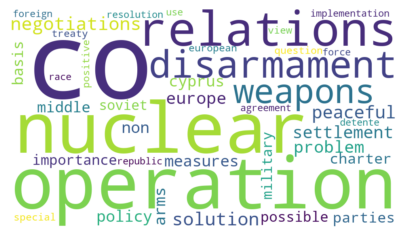

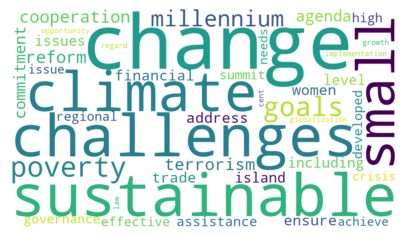

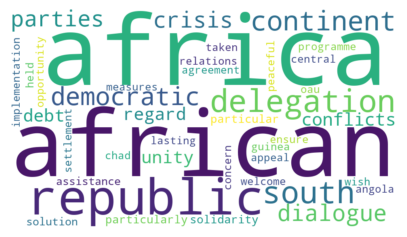

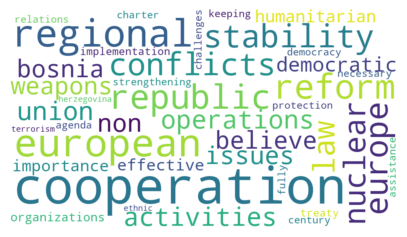

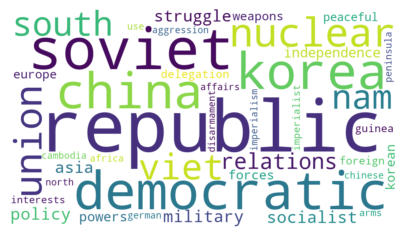

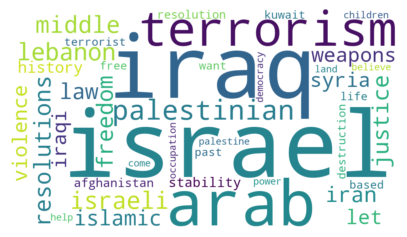

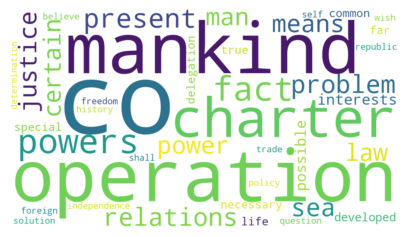

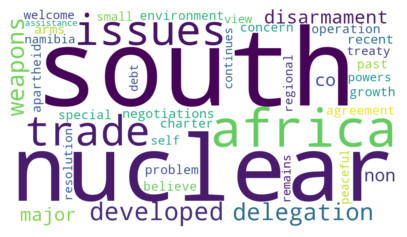

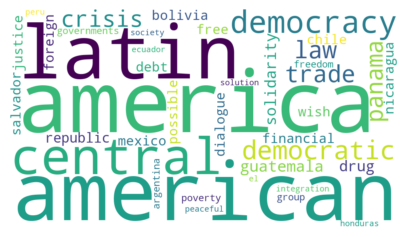

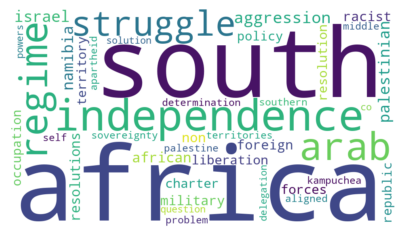

In [37]:
word_cloud_topics(lda_model,count_vectorizer.get_feature_names_out(),40)

## Calculating Topic Distibution of documents and its evolution over time

In [40]:
before_1990 = np.array(df['year']<1990)
after_1990 = ~before_1990

In [47]:
W_matrix_ante = nmf_model.transform(tfidf_M[before_1990])
W_matrix_post = nmf_model.transform(tfidf_M[after_1990])

In [64]:
nmf_model.transform(tfidf_M[1990])

array([[2.74757724e-03, 0.00000000e+00, 5.41985522e-03, 1.53318286e-03,
        7.08670603e-04, 2.94889352e-03, 2.81218417e-03, 0.00000000e+00,
        2.52461567e-03, 6.46645798e-05]])

In [51]:
W_matrix_ante.sum()

54.55502319522068

In [56]:
print(W_matrix_ante.sum(axis=0)/W_matrix_ante.sum()*100.0)

[17.47668778  4.86552247 14.68017299 10.50064332  8.64574939  5.4932254
 16.77978753  7.76780486  8.68762635  5.1027799 ]


In [57]:
print(W_matrix_post.sum(axis=0)/W_matrix_post.sum()*100.0)

[ 2.68538868 40.57719035  7.74937492  6.87106506  6.80766859  6.97706176
 14.26474072  4.03865361  1.86225738  8.16659892]


In [73]:
year_data=[]
years=np.unique(df['year'])

1


In [77]:
for i in years:
    W_year=nmf_model.transform(tfidf_M[i])
    year_data.append([i] + list(W_year.sum(axis=0)/W_year.sum()*100.0))

In [78]:
year_data

[[1970,
  22.18168661974467,
  0.0,
  34.61210262614862,
  3.804494590344388,
  0.0,
  7.0682452895112515,
  32.33347087425107,
  0.0,
  0.0,
  0.0],
 [1971,
  0.0,
  0.0,
  17.6090341357625,
  41.49680520897899,
  0.3382192352916926,
  1.2293869690171677,
  8.977905135069358,
  7.12924316436698,
  11.542358446848857,
  11.67704770466445],
 [1972,
  15.03278870930331,
  1.1477563537056505,
  18.99562887669587,
  17.852596799510046,
  7.94877836282858,
  6.229100031970073,
  21.314962885015557,
  2.9955219363544394,
  8.482866044616472,
  0.0],
 [1973,
  26.572713333823543,
  3.2441918008392365,
  12.638851746869046,
  0.9480573028862411,
  31.565179067908677,
  0.0,
  16.66640585342865,
  8.364600894244594,
  0.0,
  0.0],
 [1974,
  44.429429233810076,
  0.0,
  1.7898150418278802,
  3.8013304287106724,
  9.56562638974194,
  6.189592701543154,
  29.460663682968047,
  1.7050218084263795,
  1.3481349604236583,
  1.7103857525481863],
 [1975,
  11.757102481264358,
  0.0,
  8.682600179574923,

In [111]:
topic_names=[]
voc=tfidf_feature_names
for topic in nmf_model.components_:
    important=topic.argsort()
    top_word=voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

In [112]:
topic_names

['Topic co operation',
 'Topic cooperation challenges',
 'Topic africa south',
 'Topic israel arab',
 'Topic nuclear weapons',
 'Topic republic democratic',
 'Topic america american',
 'Topic soviet union',
 'Topic kampuchea struggle',
 'Topic iraq iran']

In [113]:
columns_name=['year'] + topic_names

In [114]:
df_year=pd.DataFrame(year_data,columns=columns_name).set_index('year')

In [115]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1970 to 2015
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Topic co operation            46 non-null     float64
 1   Topic cooperation challenges  46 non-null     float64
 2   Topic africa south            46 non-null     float64
 3   Topic israel arab             46 non-null     float64
 4   Topic nuclear weapons         46 non-null     float64
 5   Topic republic democratic     46 non-null     float64
 6   Topic america american        46 non-null     float64
 7   Topic soviet union            46 non-null     float64
 8   Topic kampuchea struggle      46 non-null     float64
 9   Topic iraq iran               46 non-null     float64
dtypes: float64(10)
memory usage: 4.0 KB


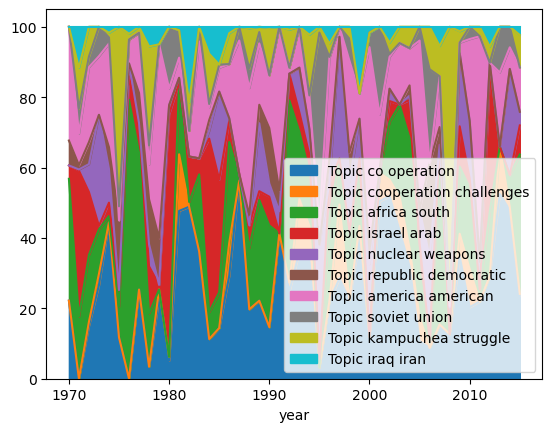

In [120]:
A=df_year.plot.area()
plt.show()